<a href="https://colab.research.google.com/github/Frutta111/Deep-Learning-In-PyTorch/blob/main/4_Basic_Steps_for_Training_a_Neural_Network_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Basic Steps for Training a Neural Network**

5/5/2024


In this notebook, we will cover the basic steps required for training a neural network.

We will:


*  define a **DataLoader** for tabular data and use it to train several neural networks.
*   We will demonstrate the use of the DataLoader for **training** a deep neural network that predicts a categorical variable based on other features.
*   We will **evaluate** the network's performance on a test set.

The model will be trained on the **Diabetes dataset** to predict the level of diabetes for each patient.
In the first model, we will aim to predict the level of diabetes based on deciles (10 percentiles), while in the second part, we will predict it based on quintiles (100 percentiles).


##**Part A: Getting started**

Data Description:
* The Diabetes dataset is a csv file containing 442 different records for different patients holding information about the patient, and an additional column (Y) with the Diabetes' progression rate.
* The Data contain ten baseline variables, including age, sex, body mass index, average blood pressure, and six blood serum measurements,ed for each of n = 442 diabetes patients.
* The column (Y) is a quantitative measure of disease progression one year after baseline. This variable contains the blood sugar level. Column (Y) will be the response variable of interest in our models.

Data source:
* Efron, Bradley, et al. "Least angle regression." The Annals of statistics 32.2 (2004): 407-499.

More information about the data is [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)










###**1. Import the dataset with Pandas to Google Drive**

In [1]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive') # Mount Google Drive
file_path = '/content/drive/My Drive/data/diabetes.csv' # Path to the CSV in Google Driv

df = pd.read_csv(file_path, sep='\t') # Read the CSV file using Pandas


Mounted at /content/drive


###**2. Exploratory data analysis (EDA)**

Display the first 5 rows of the dataset

In [2]:
# Display the first 5 rows of the dataset.
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


Information about the columns

In [3]:
print("Shape of DataFrame:", df.shape)  # Number of rows and columns
print("\nColumns in DataFrame:", df.columns.tolist())  # List of column names
print("\nData Types of Columns:\n", df.dtypes) # Data types of columns
print("\nInformation about DataFrame:\n", df.info()) # Concise summary of DataFrame including data types and memory usage

Shape of DataFrame: (442, 11)

Columns in DataFrame: ['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']

Data Types of Columns:
 AGE      int64
SEX      int64
BMI    float64
BP     float64
S1       int64
S2     float64
S3     float64
S4     float64
S5     float64
S6       int64
Y        int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB

Information about DataFrame:
 None


Summary statistics of the features

In [4]:
print("\nSummary Statistics:\n", df.describe().round(4)) # Summary statistics of numeric columns


Summary Statistics:
             AGE       SEX       BMI        BP        S1        S2        S3  \
count  442.0000  442.0000  442.0000  442.0000  442.0000  442.0000  442.0000   
mean    48.5181    1.4683   26.3758   94.6470  189.1403  115.4391   49.7885   
std     13.1090    0.4996    4.4181   13.8313   34.6081   30.4131   12.9342   
min     19.0000    1.0000   18.0000   62.0000   97.0000   41.6000   22.0000   
25%     38.2500    1.0000   23.2000   84.0000  164.2500   96.0500   40.2500   
50%     50.0000    1.0000   25.7000   93.0000  186.0000  113.0000   48.0000   
75%     59.0000    2.0000   29.2750  105.0000  209.7500  134.5000   57.7500   
max     79.0000    2.0000   42.2000  133.0000  301.0000  242.4000   99.0000   

             S4        S5        S6         Y  
count  442.0000  442.0000  442.0000  442.0000  
mean     4.0702    4.6414   91.2602  152.1335  
std      1.2904    0.5224   11.4963   77.0930  
min      2.0000    3.2581   58.0000   25.0000  
25%      3.0000    4.2767 

Plot boxplots of features

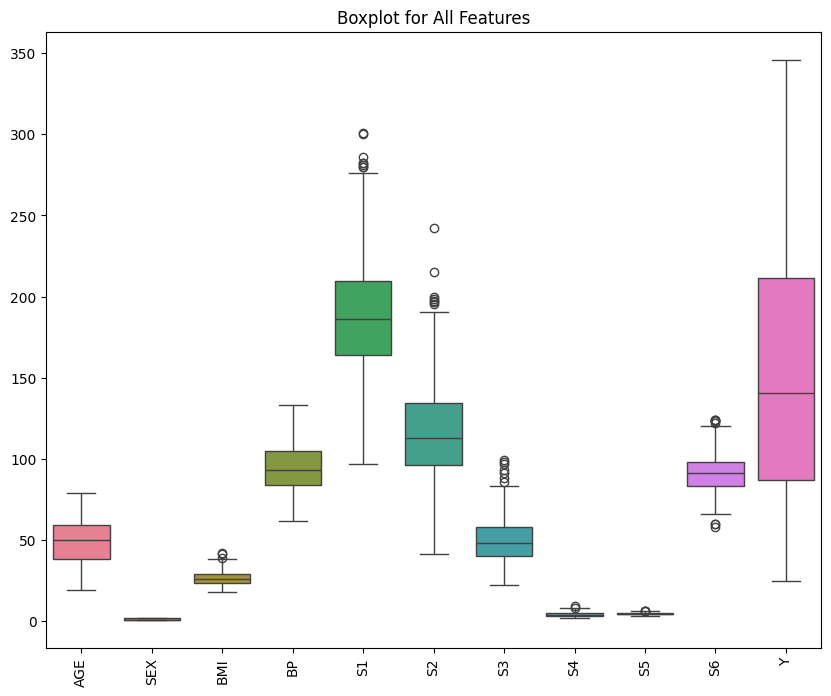

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for all columns
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.title('Boxplot for All Features')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.show()

###**Percentiles of variable Y**

Calculate precentiles of variable Y which is our target variable:

In [6]:
#Create a vector of percentiles
def create_percentiles_vec(num_percentiles):
    step = 1 / num_percentiles
    percentiles_vec = [round(step * i , 4) for i in range(1, num_percentiles + 1)]
    return percentiles_vec

In [7]:
# Create a vector of 10 percentiles
percentiles_vec = create_percentiles_vec(10)
print(percentiles_vec)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


In [8]:
# Calculate the percentiles for the 'Y' column with "quantile" method
percentiles = df['Y'].quantile(percentiles_vec)
print("percentiles:\n", percentiles)

percentiles:
 0.1     60.0
0.2     77.0
0.3     94.0
0.4    115.0
0.5    140.5
0.6    168.0
0.7    196.7
0.8    232.0
0.9    265.0
1.0    346.0
Name: Y, dtype: float64


Create a new column `Class` which is the percentile of variable Y using "qcut" method

In [9]:
import pandas as pd

percentile = pd.qcut(df['Y'], q=10)  # Calculate percentile ranges
y_label = pd.qcut(df['Y'], q=10, labels=False) + 1 # Calculate percentiles starting from 1

df['percentile_range'] = percentile # Insert the percentile range column into the DataFrame
df['class'] = y_label # Insert the class column into the DataFrame

df.head() # Display the DataFrame


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y,percentile_range,class
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151,"(140.5, 168.0]",6
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75,"(60.0, 77.0]",2
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141,"(140.5, 168.0]",6
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206,"(196.7, 232.0]",8
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135,"(115.0, 140.5]",5


As we can see below, each "decile" class contains approximately one-tenth of the data:

In [10]:
# Get unique percentile ranges and their counts
percentile_counts = df['percentile_range'].value_counts().sort_index()

# Print percentile ranges and counts of samples they contain
for percentile_range, count in percentile_counts.items():
    print(f"Percentile Range: {percentile_range}, Count: {count}")

Percentile Range: (24.999, 60.0], Count: 46
Percentile Range: (60.0, 77.0], Count: 45
Percentile Range: (77.0, 94.0], Count: 43
Percentile Range: (94.0, 115.0], Count: 44
Percentile Range: (115.0, 140.5], Count: 43
Percentile Range: (140.5, 168.0], Count: 46
Percentile Range: (168.0, 196.7], Count: 42
Percentile Range: (196.7, 232.0], Count: 45
Percentile Range: (232.0, 265.0], Count: 44
Percentile Range: (265.0, 346.0], Count: 44


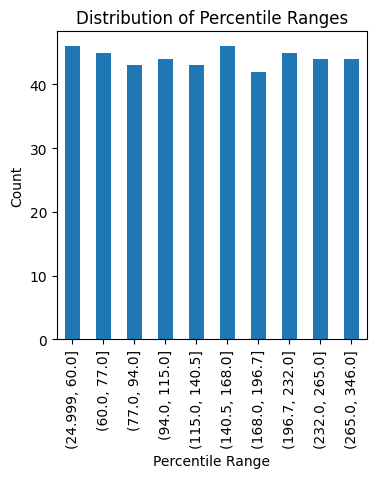

In [11]:
import matplotlib.pyplot as plt

# Plot histogram of percentile ranges
plt.figure(figsize=(4, 4))
percentile_counts.plot(kind='bar')
plt.xlabel('Percentile Range')
plt.ylabel('Count')
plt.title('Distribution of Percentile Ranges')
plt.xticks(rotation=90)
plt.show()

Drop column `percentile_range` from df:

In [12]:
df.drop(columns=['percentile_range'], inplace=True)
# df.head() # Display the DataFrame

###**4. Create a DataSet object**


Now we will create the wraper pytorch dataset to hold the labeled dataset.

Here's how to define a PyTorch Dataset class with the required methods. In this implementation:

* Constructor (__init__): Initializes the dataset with a DataFrame and column  names for features and target.
* Get Item (__getitem__): Retrieves a sample from the DataFrame, converts features and target to PyTorch tensors.
* Length (__len__): Returns the number of samples in the dataset.







In [13]:
import torch
from torch.utils.data import Dataset

class DiabetesDataset(Dataset):
    def __init__(self, dataframe):
        """
        Initialize the dataset with the dataframe.
        Args:
            dataframe (pd.DataFrame): DataFrame containing the data.
        """
        self.data = dataframe

    def __len__(self):
        """
        Return the number of samples in the dataset.
        """
        return len(self.data)

    def __getitem__(self, idx):
        """
        Retrieve a sample from the dataset.
        Args:
            idx (int): Index of the sample to retrieve.
        Returns:
            tuple: A tuple containing features and target for the sample at index idx.
        """
        sample = self.data.iloc[idx]
        record = torch.tensor(sample[:-1].values, dtype=torch.float32)  # Assuming the last column is the target and  Convert features to float
        label = torch.tensor(sample.iloc[-1], dtype=torch.float32)-1  # Multi class target must start with 0
        return record, label

###**5. Create a DataLoader object**

Here we create a DataLoader object that loads the data in minibatches of size 10 samples:

In [14]:
from torch.utils.data import DataLoader

# Custom the data to DataLoader
custom_dataset = DiabetesDataset(df)

# Create a DataLoader object
train_dataloader = DataLoader(custom_dataset, batch_size=10, shuffle=True)

Print a single batch

In [15]:
train_records, train_labels = next(iter(train_dataloader)) #get next batch
print("train_records:\n", train_records)

train_records:
 tensor([[ 55.0000,   1.0000,  32.9000, 102.0000, 164.0000, 106.2000,  41.0000,
           4.0000,   4.4308,  89.0000, 288.0000],
        [ 26.0000,   2.0000,  30.3000,  89.0000, 218.0000, 152.2000,  31.0000,
           7.0000,   5.1591,  82.0000, 137.0000],
        [ 54.0000,   2.0000,  27.7000, 113.0000, 200.0000, 128.4000,  37.0000,
           5.0000,   5.1533, 113.0000, 297.0000],
        [ 47.0000,   1.0000,  32.4000, 105.0000, 188.0000, 125.0000,  46.0000,
           4.0900,   4.4427,  99.0000, 109.0000],
        [ 60.0000,   2.0000,  22.8000, 110.0000, 245.0000, 189.8000,  39.0000,
           6.0000,   4.3944,  88.0000, 253.0000],
        [ 50.0000,   2.0000,  25.6000, 101.0000, 229.0000, 162.2000,  43.0000,
           5.0000,   4.7791, 114.0000, 100.0000],
        [ 67.0000,   2.0000,  24.0000,  83.0000, 143.0000,  77.2000,  49.0000,
           3.0000,   4.4308,  94.0000,  71.0000],
        [ 43.0000,   1.0000,  18.5000,  87.0000, 163.0000,  93.6000,  61.0000,
  

In [16]:
print("\ntrain_labels:\n" , train_labels )


train_labels:
 tensor([9., 4., 9., 3., 8., 3., 1., 2., 8., 4.])


print size of one batch

In [17]:
print(train_records.size())
print(train_labels.size())
print("number of features = ", train_records.size()[1])

torch.Size([10, 11])
torch.Size([10])
number of features =  11


##**Part B: Define Procedurs for Training a Neural Network (NN)**

In this section, we will define functions that we will use for training a neural network:

1. Prepare data and split to train and test
2. Compare train and test set distiiribution
3. Custom dataset to DataLoder
4. Iterate one batch
5. Iterate one epoch
6. Calculate loss and accuracy of the model on the test data
7. Model training and evaluation
8. Plotting the training progress over the epochs

**Let's build** the process from the beginning,

###**1. Prepare data and split to train and test**

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def prepare_data(df, pct, transform=False , stratify_sample=True):
  '''
    This function prepares the data for modeling by performing the following steps:
    1. Converts the target variable 'Y' into percentiles.
    2. Splits the data into training and testing sets (80%-20%).
    3. Optionally scales all features using StandardScaler.

    Args:
        df (DataFrame): DataFrame containing the target variable named Y
        pct (int): Number of percentiles to perform on Y
        transform (bool): Whether to scale the features (default: False)
        stratify_sample (bool): Whether to stratify the sampling (default: True)

    Output:
        X_train, X_test (DataFrame): Features
        y_train, y_test (Series): Percentiles of Y
  '''

  # Calculate percentiles starting from 0
  y  = pd.qcut(df['Y'], q=pct, labels=False)
  X = df.copy() # Features

  # Print min and max of Y and counts in each percentile (sorted)
  # print(f"Percentile Range (Minimum , Maximum) of the dataset before spliting to train and test:")
  # for percentile_range, group in df.groupby(y):
  #     print(f"({group['Y'].min()}, {group['Y'].max()}] , Count: {len(group)}")


  # Get unique percentile ranges and their counts
  percentile_counts = y.value_counts().sort_index()

  # Generate labels for x-axis
  percentile_ranges = [f"({group['Y'].min()}, {group['Y'].max()}]" for _, group in df.groupby(y)]

  # Plot histogram of percentile ranges
  plt.figure(figsize=(15, 4))
  percentile_counts.plot(kind='bar')
  plt.xlabel('Percentile Range')
  plt.ylabel('Count')
  plt.title('Distribution of Percentile Ranges')
  plt.xticks(range(len(percentile_ranges)), percentile_ranges, rotation=90)
  plt.show()

  # Step 1: Split the data into training and testing sets
  if (stratify_sample):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y )
  else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  if (transform):

      # Step 2: Scale the features
      scaler = StandardScaler()
      X_train_scaled = scaler.fit_transform(X_train)  # Fit scaler to training data and transform training data
      X_test_scaled = scaler.transform(X_test)        # Transform testing data using the parameters learned from training data

      # Convert the scaled training features to a DataFrame
      X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)

      # Convert the scaled testing features to a DataFrame
      X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

      return  X_train_scaled, X_test_scaled, y_train, y_test

  else:
    return  X_train, X_test, y_train, y_test

###**2. Compare train and test set distiiribution**

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
import pandas as pd
def print_summary_statistics( X_train, X_test, y_train, y_test):
        # Print summary statistics of numeric columns
        print("\nSummary Statistics x_train:\n", X_train.describe().round(4))
        print("\nSummary Statistics x_test:\n", X_test.describe().round(4))

        # Assuming y_train and y_test are pandas Series or arrays
        y_train_freqs = pd.Series(y_train).value_counts().sort_index()
        y_test_freqs = pd.Series(y_test).value_counts().sort_index()

In [21]:
def plot_summary_statistics(X_train, X_test, y_train, y_test):
    '''
    This function plots the summary statistics of numeric columns in X_train and X_test using box plots,
    and also plots the class frequencies for y_train and y_test.

    Args:
        X_train (DataFrame): Training features
        X_test (DataFrame): Testing features
        y_train (Series or array): Training target values
        y_test (Series or array): Testing target values
    Output:
        None (displays box plots and class frequency bar charts)
    '''
    # Plot box plots for features in X_train and X_test
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    X_train.boxplot(grid=False)
    plt.title('Summary Statistics of X_train')
    plt.xticks(rotation=45)
    plt.ylabel('Values')

    plt.subplot(1, 2, 2)
    X_test.boxplot(grid=False)
    plt.title('Summary Statistics of X_test')
    plt.xticks(rotation=45)
    plt.ylabel('Values')

    plt.tight_layout()
    plt.show()

In [22]:
import matplotlib.pyplot as plt

def plot_class_frequencies(y_train, y_test):
    '''
    This function plots the class frequencies for y_train and y_test with a fixed y-axis range.

    Args:
        y_train (Series or array): Training target values
        y_test (Series or array): Testing target values
    Output:
        None (displays histograms of class frequencies)
    '''
    # Calculate class frequencies
    y_train_freqs = pd.Series(y_train).value_counts().sort_index()
    y_test_freqs = pd.Series(y_test).value_counts().sort_index()

    # Determine the maximum frequency value for consistent y-axis scaling
    max_freq = max(y_train_freqs.max(), y_test_freqs.max())

    # Plot class frequencies
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    y_train_freqs.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Class Frequencies in y_train')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.ylim(0, max_freq)  # Set fixed y-axis limit

    plt.subplot(1, 2, 2)
    y_test_freqs.plot(kind='bar', color='salmon', edgecolor='black')
    plt.title('Class Frequencies in y_test')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.ylim(0, max_freq)  # Set fixed y-axis limit

    plt.tight_layout()
    plt.show()


###**3. Custom dataset to DataLoder**

In [23]:
import torch
from torch.utils.data import Dataset

class DiabetesDataset(Dataset):
    # Constructor
    def __init__(self, X, y):
        self.X = X
        self.y = y

    # A method that returns the number of samples in the dataset
    def __len__(self):
        return len(self.y)

    # A method that returns an element from the collection
    def __getitem__(self, idx):
        sample_X = self.X.iloc[idx]
        sample_y = self.y.iloc[idx]
        record = torch.tensor(sample_X.values, dtype=torch.float32)
        label = torch.tensor(sample_y, dtype=torch.long)   #label must start with 0
        return record, label

###**4. Iterate one batch**

In [24]:
import torch
from tqdm import tqdm

In [25]:
def iterate_batch(features, labels , model, optimizer, criterion):
  '''
    This function performs a single optimization step on a batch of data.

    Args:
        features (Tensor): Input features for the batch
        labels (Tensor): True labels for the batch
        model (torch.nn.Module): The neural network model
        optimizer (torch.optim.Optimizer): The optimizer for parameter updates
        criterion (torch.nn.Module): The loss function

    Output:
        loss (Tensor): Value of the loss function
        acc (Tensor): Accuracy of the model on the batch
    '''
  optimizer.zero_grad()  #reset gradient to 0
  y_model = model(features) #calculte model prediction
  loss = criterion(y_model,labels) #calculate loss function
  loss.backward() #calculate grdient of loss function
  optimizer.step()  # make a step to update parameters

  predicted_labels = y_model.argmax(dim=1) #calculate predicted labels
  #acc = (predicted_labels == labels).sum() / len(labels) #calculate accuracy of the model
  acc_sum = (predicted_labels == labels).sum()  #calculate accuracy of the model
  return loss.detach(), acc_sum.detach() #disconnect  from the autograd system


###**5. Iterate one epoch**

In [26]:
  def iterate_epoch(num_features, model, optimizer, criterion, train_dataloader):
    '''
    This function iterates over one epoch of training data.

    Args:
        num_features (int): Number of features to consider from the input records
        model (torch.nn.Module): The neural network model
        optimizer (torch.optim.Optimizer): The optimizer for parameter updates
        criterion (torch.nn.Module): The loss function
        train_dataloader (DataLoader): DataLoader for training data

    Output:
        loss (Tensor): Average loss value over the epoch
        acc (Tensor): Average accuracy over the epoch
    '''
    running_loss = 0.
    running_acc  = 0.
    total_train = 0 # Initialize total train dataset size counter

    batches = len(train_dataloader)

    for records, labels in train_dataloader:
      records = records[:, :num_features]  # Consider only the specified number of features
      batch_loss, batch_acc = iterate_batch(records, labels, model, optimizer, criterion)
      running_loss += batch_loss
      running_acc  += batch_acc
      total_train += labels.size(0)

    loss = running_loss / batches
    acc  = running_acc / total_train
    return loss, acc

###**6. Calculate loss and accuracy of the model on the test data**



In [27]:
def eval_model_test(num_features, model, criterion, test_dataloader):
    '''
    This function evaluates the model on the test data.

    Args:
        num_features (int): Number of features to consider from the input records
        model (torch.nn.Module): The neural network model
        CE_loss (torch.nn.Module): The loss function
        test_dataloader (DataLoader): DataLoader for test data

    Output:
        loss (Tensor): Average loss value on the test data
        acc (Tensor): Average accuracy on the test data
    '''
    loss = 0.
    acc  = 0.
    total_test = 0 # Initialize total test dataset size counter

    test_batches = len(test_dataloader)

    for records, labels in test_dataloader:
      records = records[:, :num_features] # Consider only the specified number of features
      with torch.no_grad():  # Do the operations without computing gradients
        model.eval()
        y_model = model(records)
        loss += criterion(y_model, labels)
        predicted_labels = y_model.argmax(dim=1)
        # acc += (predicted_labels == labels).sum() / len(labels)
        acc += (predicted_labels == labels).sum()
        total_test += labels.size(0)

        # Return average loss and accuracy
    return loss/test_batches, acc/total_test

###**7. Model training and evaluation**

In [28]:
def training(num_features, model, optimizer, criterion, train_dataloader, test_dataloader, epochs, threshold):
    '''
    This function handles the model training and evaluation process.
    It also calls the plot_training_progress function.

    Args:
        num_features (int): Number of features used in the training
        model (torch.nn.Module): The neural network model
        optimizer (torch.optim.Optimizer): The optimizer for parameter updates
        criterion (torch.nn.Module): The loss function
        train_dataloader (DataLoader): DataLoader for training data
        test_dataloader (DataLoader): DataLoader for test data
        epochs (int): Number of epochs to train the model
        threshold (float): Threshold value for the horizontal line

    Output:
        None (prints training and evaluation results, and plots the training progress)
    '''
    # Model training and evluation:

    loss_train = torch.zeros(epochs)
    acc_train  = torch.zeros(epochs)
    loss_test  = torch.zeros(epochs)
    acc_test   = torch.zeros(epochs)

    for epoch_idx in tqdm(range(epochs)):
      loss_train[epoch_idx], acc_train[epoch_idx] = iterate_epoch(num_features, model, optimizer, criterion, train_dataloader)
      loss_test[epoch_idx], acc_test[epoch_idx] = eval_model_test(num_features, model, criterion, test_dataloader)

    print("\n\nAfter trainnig we get:")
    print("Evaluation on TRAIN  -  Loss function value: %.4f , Accuracy : %.2f%%" % (loss_train[-1].item(), acc_train[-1].item()*100))
    print("Evaluation on TEST  -  Loss function value: %.4f , Accuracy : %.2f%%" % (loss_test[-1].item(), acc_test[-1].item()*100))

    plot_training_progress(num_features, loss_train , acc_train  ,  loss_test ,  acc_test , threshold)


###**8. Plotting the training progress over the epochs**

In [29]:
from matplotlib import pyplot as plt

def plot_training_progress(num_features, loss_train, acc_train, loss_test, acc_test, threshold):
    '''
    This function plots the training progress (loss and accuracy) over epochs.
    Args:
        num_features (int): Number of features used in the training
        loss_train (list): List of training loss values over epochs
        acc_train (list): List of training accuracy values over epochs
        loss_test (list): List of test loss values over epochs
        acc_test (list): List of test accuracy values over epochs
        threshold (float): Threshold value for the horizontal line
        pct(int): Number of percentails (class)
        learning_rate(float): The learning rate used in the training process

    Output:
        None (plots the training progress)
    '''

    if num_features == 11:
        includeY = True
    else:
        includeY = False

    epochs = len(loss_train)

    plt.figure(figsize=(12, 4))

    # Plot training and test loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs + 1), loss_train, label="Train Loss")
    plt.plot(range(1, epochs + 1), loss_test, label="Test Loss")
    plt.title(f"CE loss\n pct={pct}   include Y={includeY}    lr={learning_rate}")
    plt.legend()
    plt.xlabel("Epoch Number")

    # Plot training and test accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs + 1), acc_train, label="Train Acc")
    plt.plot(range(1, epochs + 1), acc_test, label="Test Acc")
    plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
    plt.title(f"Accuracy\n pct={pct}   include Y={includeY}    lr={learning_rate}")
    plt.legend()
    plt.xlabel("Epoch Number")

    plt.show()


**Note**: In regular learning processes, it is not customary to monitor the model's progress on test data, as it may compromise the test's integrity and influence model selection. It's typically used only for final evaluation after model selectionI have only done so here for my personal learning purposes to ensure that things are working and to understand their impact. Define a separate validation dataset cab be used to evaluate the model's performance on data it hasn't seen during training.  It helps to estimate how well the model generalizes to unseen data and to choose the hyper-parameters values.

##**Part C: Run the training process**

In this section, we will design the architecture for the Neural Network (NN) to classify the tenth precentile of the Diabetes' progression. We will use a data loader and torch.nn to create the architecture. Since we have a small dataset with only 10 features, we will simply create a fully connected NN with a small number of layers and neurons.

We've normalized the features so that their mean will be equal to 0 and their variance to 1.


Assume that our goal is to achieve at least 10% accuracy.

###**1.Import data**

In [30]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive') # Mount Google Drive
file_path = '/content/drive/My Drive/data/diabetes.csv' # Path to the CSV in Google Drive
df = pd.read_csv(file_path, sep='\t') # Read the CSV file using Pandas

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####**Case of 10 percentiles**

#####Custom dataset and create DataLoader objects

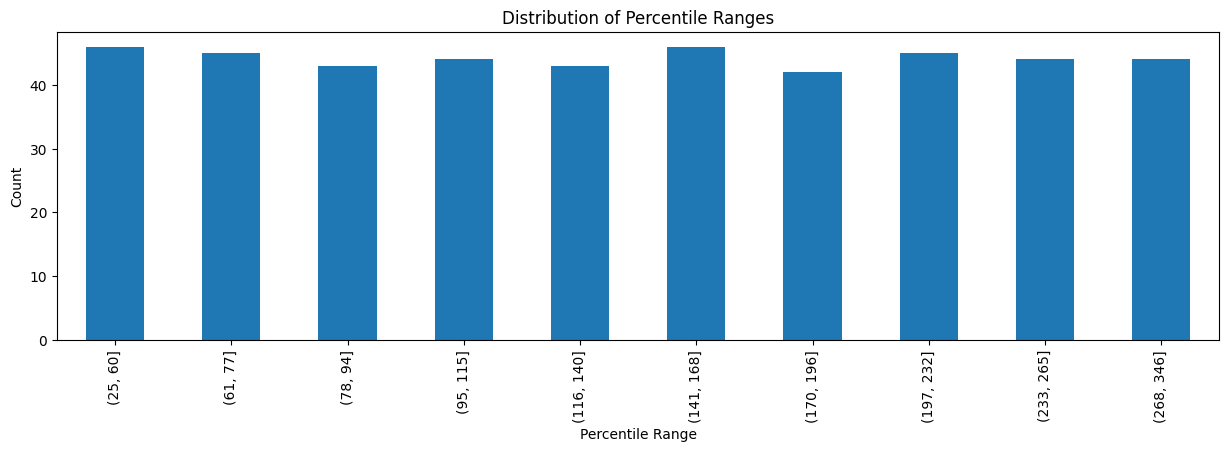

In [61]:
from torch.utils.data import DataLoader

pct = 10 #number of percentiles

# Prepare data to the relevant model
X_train, X_test, y_train, y_test = prepare_data(df, pct, transform=True, stratify_sample=True)

#####Compare train and test sets

Below are the summary statistics, which show that both the training and testing datasets are standardized, with features generally having a mean close to zero and a standard deviation around one. For the training set, all features have similar ranges and distributions, while the test set shows slightly different means and standard deviations due to scaling with the train mean and variance. Class frequencies for y_train are evenly distributed among percentiles, whereas the test set has very similar frequencies but with one class having one fewer sample. This indicates a good balance in the dataset splitting and stratification.

In [32]:
# print_summary_statistics( X_train, X_test, y_train, y_test)

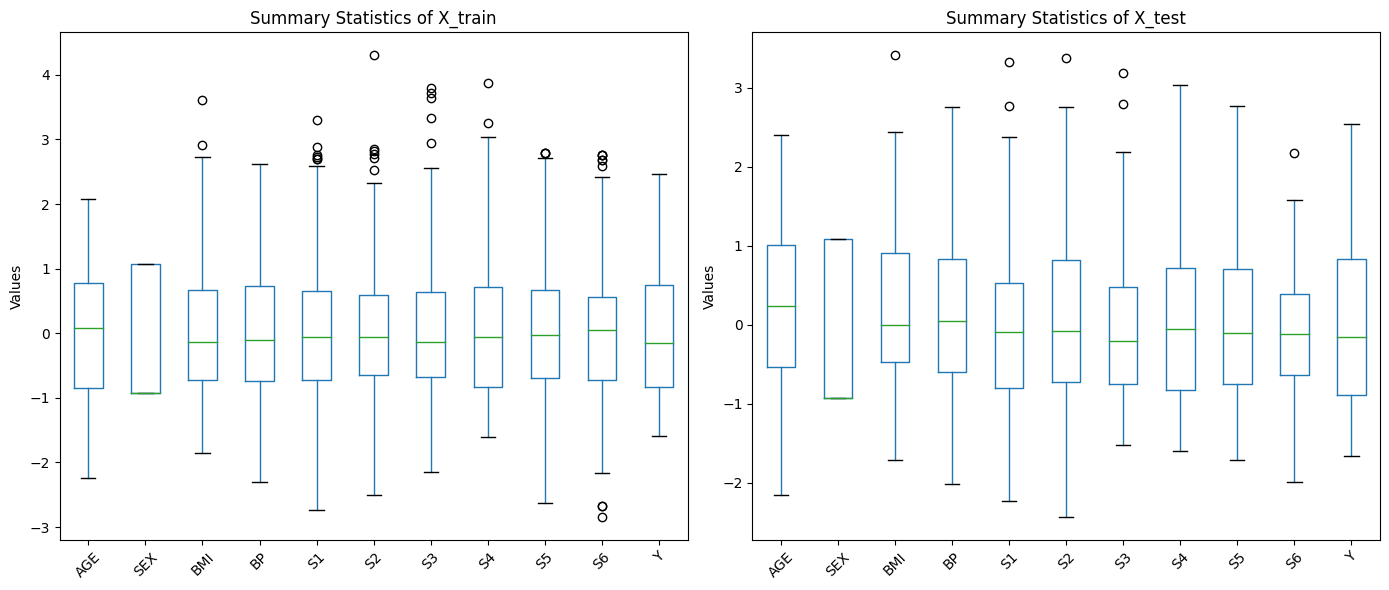

In [33]:
plot_summary_statistics(X_train, X_test, y_train, y_test)

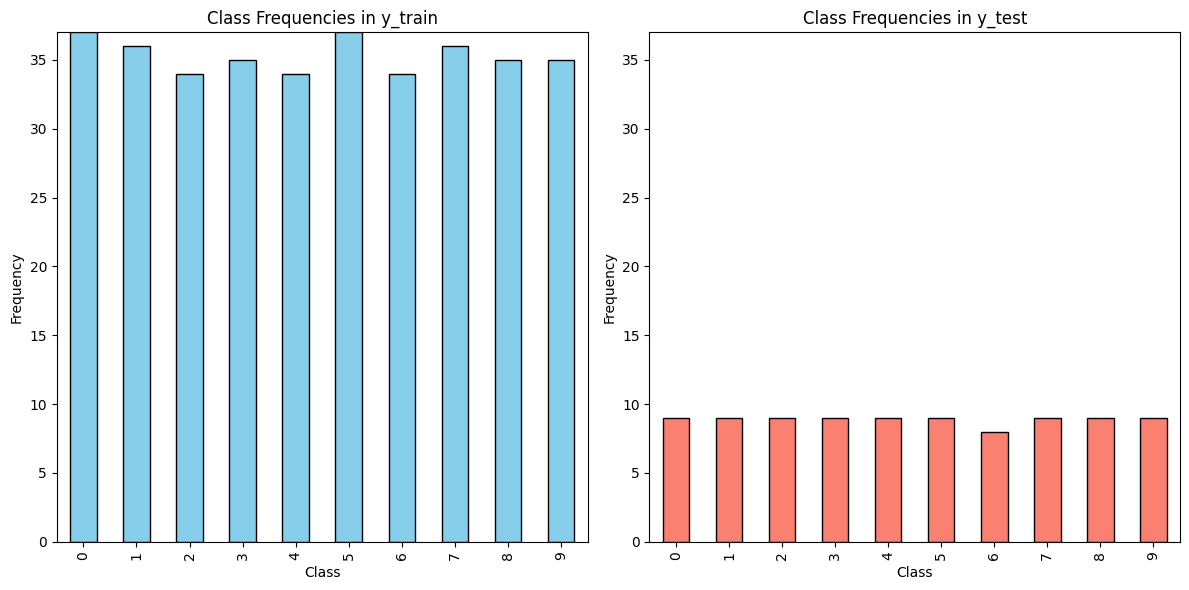

In [34]:
plot_class_frequencies(y_train, y_test)

#####Create a DataLoader object

In [35]:
bs = 10 #batch_size

# Custom the data to DataLoader
custom_train_dataset = DiabetesDataset(X_train, y_train)
custom_test_dataset = DiabetesDataset(X_test, y_test)

# Create a DataLoader object
train_dataloader = DataLoader(custom_train_dataset, batch_size=bs, shuffle=True)
test_dataloader = DataLoader(custom_test_dataset, batch_size=len(y_test), shuffle=True)

#####Model #1: Including variable Y in the features

model definition and training:

model#1 - NeuralNetwork10pct , including Y
Sequential(
  (0): Linear(in_features=11, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

batch size: 10 , learning rate: 0.01



100%|██████████| 200/200 [00:16<00:00, 12.41it/s]




After trainnig we get:
Evaluation on TRAIN  -  Loss function value: 0.3219 , Accuracy : 94.33%
Evaluation on TEST  -  Loss function value: 0.6152 , Accuracy : 66.29%


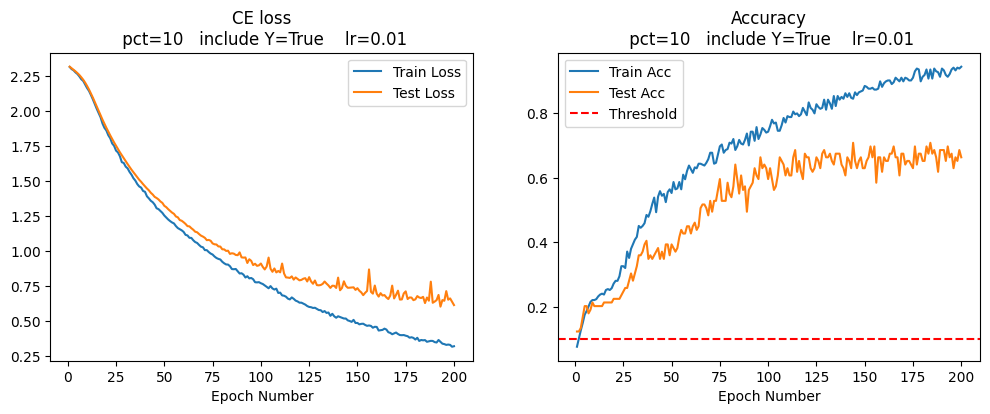

In [36]:
from torch import nn

# Set hyperparameters
pct = 10 #number of percentiles
num_features = 11 # Input_dim: number of features (including Y)
num_classes = pct # Output_dim: number of percentiles
threshold = 0.10
learning_rate = 0.01
epochs = 200

# Initialize model, optimizer, and loss function
DiabetesPrecentileClassifer =  nn.Sequential(
                      nn.Linear(num_features,64),
                      nn.ReLU(),
                      nn.Linear(64,32),
                      nn.ReLU(),
                      nn.Linear(32,num_classes),
                      nn.LogSoftmax(dim=1)  #log(y)
                      )
model = DiabetesPrecentileClassifer
criterion   = nn.NLLLoss()   #negative log-likelihood loss. It expects the input to be log-probabilities (LogSoftmax layer)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #Stochastic Gradient Descent


# Print the model
print("model#1 - NeuralNetwork10pct , including Y")
print(model)
print(f"\nbatch size: {bs} , learning rate: {learning_rate}\n")

# Train the model
training(num_features=num_features,
         model=model,
         optimizer=optimizer,
         criterion=criterion,
         train_dataloader=train_dataloader,
         test_dataloader=test_dataloader,
         epochs=epochs,
         threshold=threshold)


Data evaluation on test set

In [37]:
loss_test , acc_test = eval_model_test(num_features, model, criterion, test_dataloader)
print("Evaluation on TEST  -  Loss function value: %.4f , Accuracy : %.2f%%" % (loss_test.item(), acc_test.item()*100))


Evaluation on TEST  -  Loss function value: 0.6152 , Accuracy : 66.29%


#####Model #2: Without including variable Y in the features

model#2 - NeuralNetwork10pct , without including Y
Sequential(
  (0): Linear(in_features=10, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

batch size: 10 , learning rate: 0.01



100%|██████████| 200/200 [00:15<00:00, 12.71it/s]




After trainnig we get:
Evaluation on TRAIN  -  Loss function value: 1.5585 , Accuracy : 43.91%
Evaluation on TEST  -  Loss function value: 2.2305 , Accuracy : 21.35%


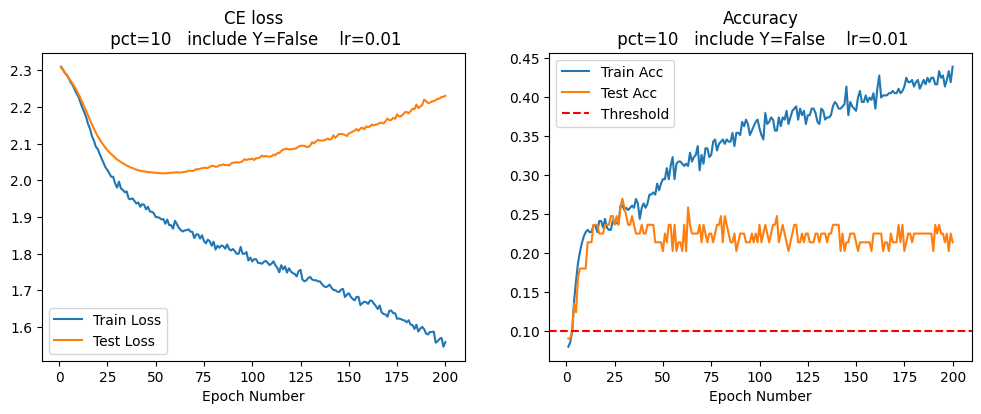

In [38]:
from torch import nn

# Set hyperparameters
pct = 10 #number of percentiles
num_features = 10 # Input_dim: number of features (including Y)
num_classes = pct # Output_dim: number of percentiles
threshold = 0.10
learning_rate = 0.01
epochs = 200

# Initialize model, optimizer, and loss function
DiabetesPrecentileClassifer =  nn.Sequential(
                      nn.Linear(num_features,64),
                      nn.ReLU(),
                      nn.Linear(64,32),
                      nn.ReLU(),
                      nn.Linear(32,num_classes),
                      nn.LogSoftmax(dim=1)  #log(y)
                      )
model = DiabetesPrecentileClassifer
criterion   = nn.NLLLoss()   #negative log-likelihood loss. It expects the input to be log-probabilities (LogSoftmax layer)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #Stochastic Gradient Descent

# Print the model
print("model#2 - NeuralNetwork10pct , without including Y")
print(model)
print(f"\nbatch size: {bs} , learning rate: {learning_rate}\n")

# Train the model
training(num_features=num_features,
         model=model,
         optimizer=optimizer,
         criterion=criterion,
         train_dataloader=train_dataloader,
         test_dataloader=test_dataloader,
         epochs=epochs,
         threshold=threshold)


Data evaluation on test set

In [39]:
loss_test , acc_test = eval_model_test(num_features, model, criterion, test_dataloader)
print("Evaluation on TEST  -  Loss function value: %.4f , Accuracy : %.2f%%" % (loss_test.item(), acc_test.item()*100))

Evaluation on TEST  -  Loss function value: 2.2305 , Accuracy : 21.35%


Summary of Findings and Conclusions:

We trained two neural networks on the dataset to predict the classes. One of the neural networks had the Y values as a feature, and the other one didn't. The classes were directly computed through the Y values, thus it is highly correlated with the target variable,  so it is expected that the first NN will perform better.

####**Case of 100 percentiles**

In this section, we will divide the dataset to 100 classes instead of 10 and train the networks again on this new dataset. The classes will now represent the hundredth precentile.

#####Custom dataset and create DataLoader objects

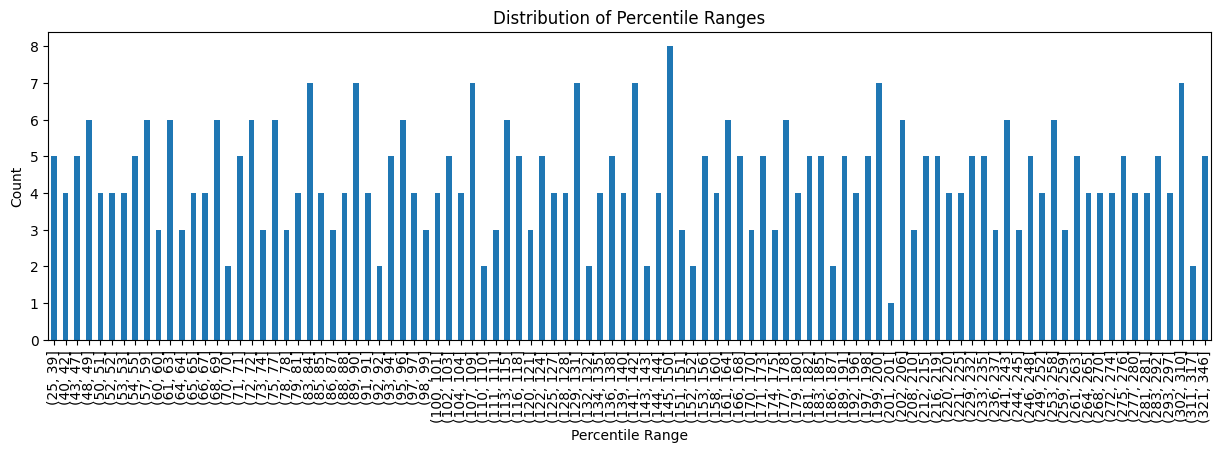

In [60]:
from torch.utils.data import DataLoader

pct = 100 #number of percentiles

# Prepare data to the relevant model
X_train, X_test, y_train, y_test = prepare_data(df, pct, transform=True, stratify_sample=None)

**Notice** that the classes are very small and it's difficult to distinguish between them. some calsses have less than 3 samples and some above 6. some class contain onle one value of Y!

#####compare train and test sets

Below are the summary statistics, which show that both the training and testing datasets are standardized, with features generally having a mean close to zero and a standard deviation around one. For the training set, all features have similar ranges and distributions, while the test set shows slightly different means and standard deviations due to scaling with the train mean and variance. Class frequencies for y_train are evenly distributed among percentiles, whereas the test set has very similar frequencies but with one class having one fewer sample. This indicates a good balance in the dataset splitting and stratification.

In [ ]:
# print_summary_statistics( X_train, X_test, y_train, y_test)

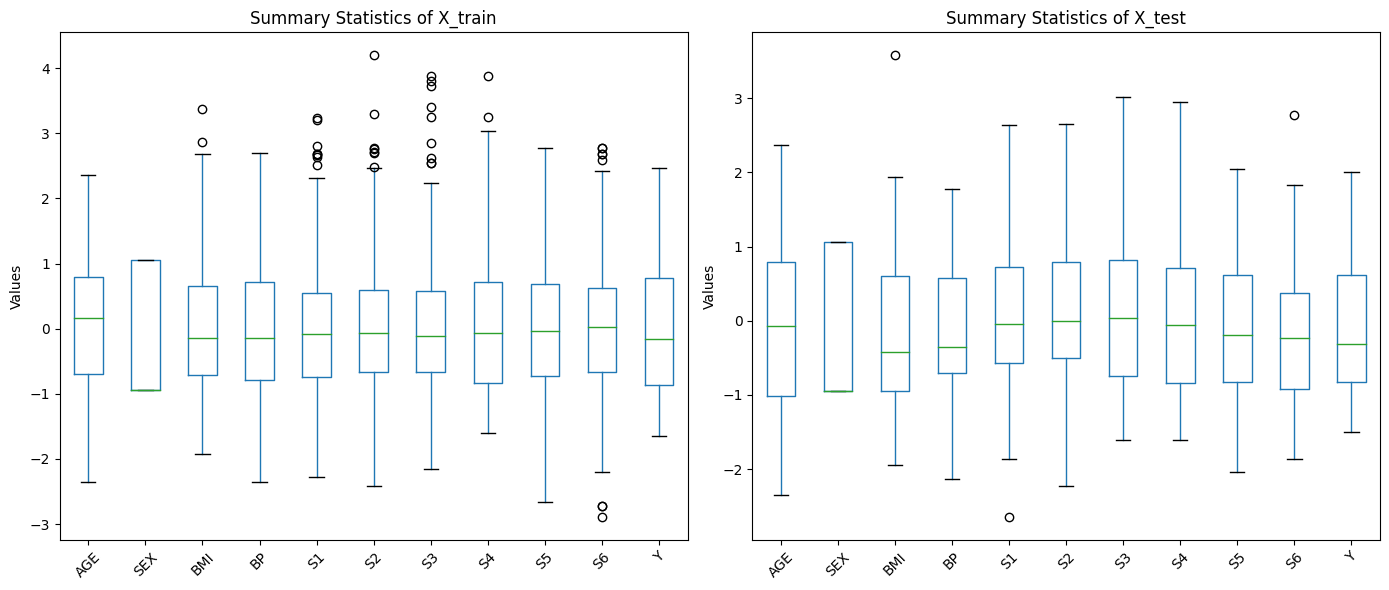

In [42]:
plot_summary_statistics(X_train, X_test, y_train, y_test)

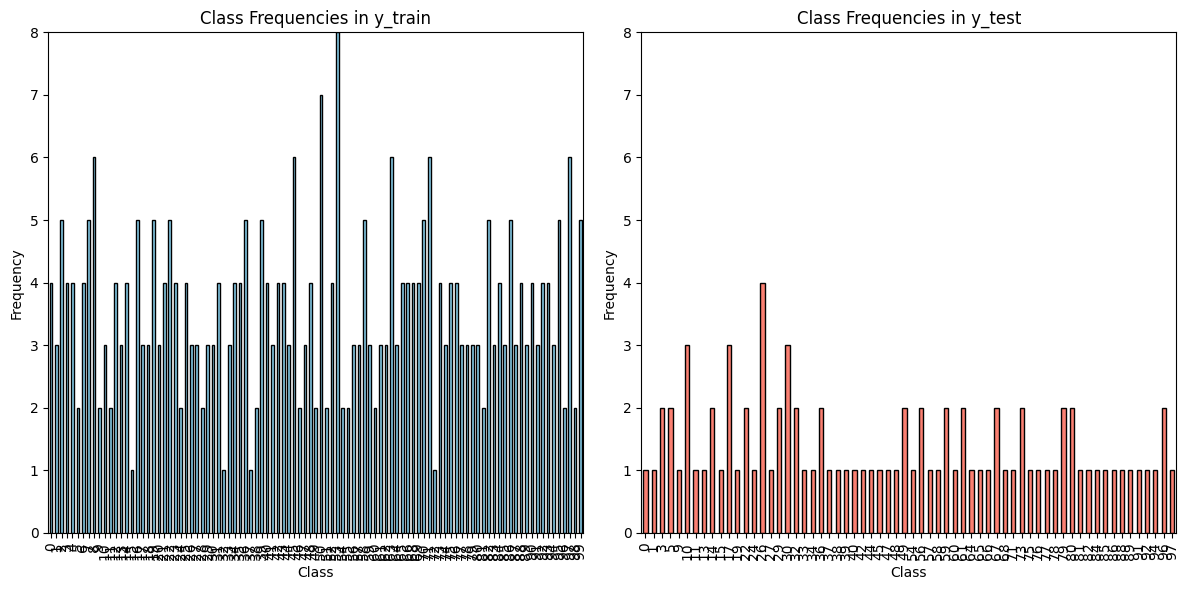

In [43]:
plot_class_frequencies(y_train, y_test)

#####Create a DataLoader object

In [44]:
bs = 10 #batch_size

# Custom the data to DataLoader
custom_train_dataset = DiabetesDataset(X_train, y_train)
custom_test_dataset = DiabetesDataset(X_test, y_test)

# Create a DataLoader object
train_dataloader = DataLoader(custom_train_dataset, batch_size=bs, shuffle=True)
test_dataloader = DataLoader(custom_test_dataset, batch_size=len(y_test), shuffle=True)

#####Model #3: Including variable Y in the features

model definition and training:

model#3 - NeuralNetwork10pct , including Y
Sequential(
  (0): Linear(in_features=11, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=100, bias=True)
  (5): LogSoftmax(dim=1)
)

batch size: 10 , learning rate: 0.01



100%|██████████| 200/200 [00:16<00:00, 12.37it/s]




After trainnig we get:
Evaluation on TRAIN  -  Loss function value: 2.0363 , Accuracy : 41.36%
Evaluation on TEST  -  Loss function value: 5.2385 , Accuracy : 6.74%


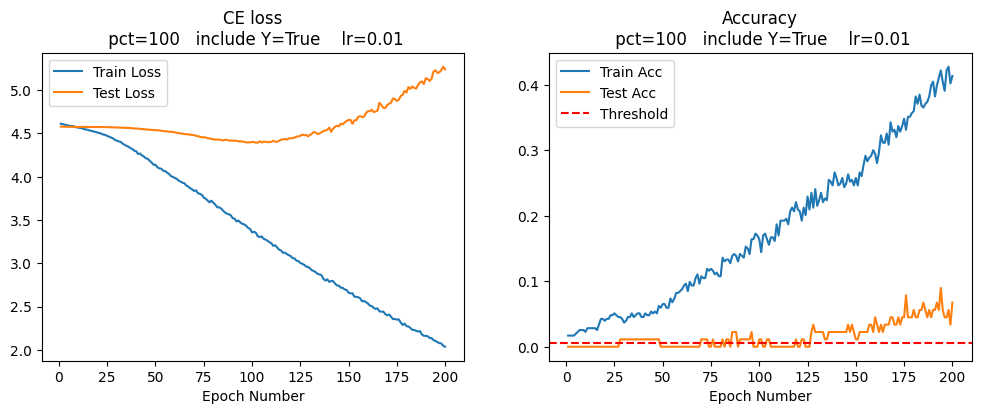

In [45]:
from torch import nn

# Set hyperparameters
pct = 100 #number of percentiles
num_features = 11 # Input_dim: number of features (including Y)
num_classes = pct # Output_dim: number of percentiles
threshold = 0.005
learning_rate = 0.01
epochs = 200

# Initialize model, optimizer, and loss function
DiabetesPrecentileClassifer =  nn.Sequential(
                      nn.Linear(num_features,64),
                      nn.ReLU(),
                      nn.Linear(64,32),
                      nn.ReLU(),
                      nn.Linear(32,num_classes),
                      nn.LogSoftmax(dim=1)  #log(y)
                      )
model = DiabetesPrecentileClassifer
criterion   = nn.NLLLoss()   #negative log-likelihood loss. It expects the input to be log-probabilities (LogSoftmax layer)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #Stochastic Gradient Descent

# Print the model
print("model#3 - NeuralNetwork10pct , including Y")
print(model)
print(f"\nbatch size: {bs} , learning rate: {learning_rate}\n")

# Train the model
training(num_features=num_features,
         model=model,
         optimizer=optimizer,
         criterion=criterion,
         train_dataloader=train_dataloader,
         test_dataloader=test_dataloader,
         epochs=epochs,
         threshold=threshold)


Data evaluation on test set

In [46]:
loss_test , acc_test = eval_model_test(num_features, model, criterion, test_dataloader)
print("Evaluation on TEST  -  Loss function value: %.4f , Accuracy : %.2f%%" % (loss_test.item(), acc_test.item()*100))

Evaluation on TEST  -  Loss function value: 5.2385 , Accuracy : 6.74%


#####Model 4: Without including variable Y in the features

model#4 - NeuralNetwork10pct , including Y
Sequential(
  (0): Linear(in_features=11, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=100, bias=True)
  (5): LogSoftmax(dim=1)
)

batch size: 10 , learning rate: 0.01



100%|██████████| 200/200 [00:16<00:00, 12.29it/s]




After trainnig we get:
Evaluation on TRAIN  -  Loss function value: 2.1333 , Accuracy : 43.34%
Evaluation on TEST  -  Loss function value: 5.0555 , Accuracy : 4.49%


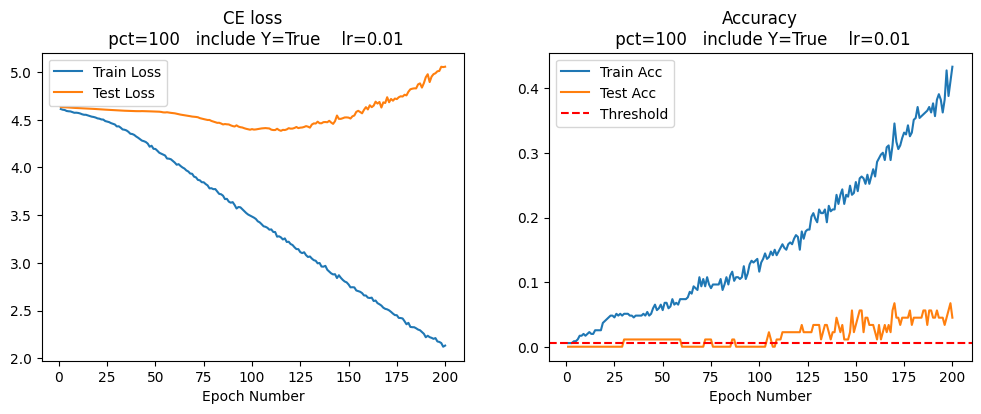

In [47]:
from torch import nn

# Set hyperparameters
pct = 100 #number of percentiles
num_features = 11 # Input_dim: number of features (including Y)
num_classes = pct # Output_dim: number of percentiles
threshold = 0.005
learning_rate = 0.01
epochs = 200

# Initialize model, optimizer, and loss function
DiabetesPrecentileClassifer =  nn.Sequential(
                      nn.Linear(num_features,64),
                      nn.ReLU(),
                      nn.Linear(64,32),
                      nn.ReLU(),
                      nn.Linear(32,num_classes),
                      nn.LogSoftmax(dim=1)  #log(y)
                      )
model = DiabetesPrecentileClassifer
criterion   = nn.NLLLoss()   #negative log-likelihood loss. It expects the input to be log-probabilities (LogSoftmax layer)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #Stochastic Gradient Descent

# Print the model
print("model#4 - NeuralNetwork10pct , including Y")
print(model)
print(f"\nbatch size: {bs} , learning rate: {learning_rate}\n")

# Train the model
training(num_features=num_features,
         model=model,
         optimizer=optimizer,
         criterion=criterion,
         train_dataloader=train_dataloader,
         test_dataloader=test_dataloader,
         epochs=epochs,
         threshold=threshold)

Data evaluation on test set

In [48]:
loss_test , acc_test = eval_model_test(num_features, model, criterion, test_dataloader)
print("Evaluation on TEST  -  Loss function value: %.4f , Accuracy : %.2f%%" % (loss_test.item(), acc_test.item()*100))

Evaluation on TEST  -  Loss function value: 5.0555 , Accuracy : 4.49%


Summary of Findings and Conclusions:

We experience much worse results, that is because the dataset is too small (around 4 instances of each class) to successfully learn how to predict a class out of 100  classes. It's not surprising since it's nearly impossible to distinguish between the percentiles. The ranges of the percentiles are very close, sometimes containing only one value of sugar level. Therefore, misclassification of close percentiles is easily done, leading to errors in all neighboring percentiles. Hence, the problem is extremely challenging for prediction.

It is preferable to use the tenth precentile as classes instead of the hundredth precentile, since the added accuracy in the Y prediction gained from the 100  classes prediction is a lesser of a gain than the added overall accuracy of the 10 classes prediction network.


Important notes:

* Regarding the model, even when training a network and the result surpasses the threshold, which wasn't high to begin with, there is still an expectation to see that the model has indeed learned something, even if not much. Therefore, it's important to observe a learning curve in the loss for both the test and train sets. Even if the learning curve isn't the best, it should exist at a minimum. What we see in the graph is the exact opposite, indicating that the model is not learning to generalize well. This is because the data is complex and sparse when divided into percentiles. Hence, a warning light should go off every time you train a model in such a case.

* Performance improvement is achieved through trial and error. We will later see common methods for improvement: changing the batch size, adjusting the learning rate, adding dropout layers, regularization, ensuring that the classes in the test set and the training set are distributed in a reasonable (similar/balanced) manner, and many other methods. We will see examples of using these methods later on.

* In a regular learning process, it is not customary to monitor the model's progress on test data since it may compromise the test's integrity and influence model selection. At most, it would be more appropriate to refer to it as a validation set.